In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O2','C2']
psi_dihedral=['C1','O2','C2','C3']

di_sugar=['MAN', 'BGC']
patterns1= ['MAN(*_*_)]-BGC(*_*_)', 'MAN(*_*_)-BGC(*_*_)','MAN(*_*_)]-[*]-BGC(*_*_)', 'MAN(*_*_)-[*]-BGC(*_*_)']
patterns2= ['DManpa1-2DGlcpb', 'DManpa1-2]DGlcpb', 'DManpa1-2[*]DGlcpb']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-2D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A0T', '1A0T', '1A0T', '1A0T', '1A0T', '1A0T', '1A14', '1AA5', '1AA5', '1AF6', '1AF6', '1AF6', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AGM', '1AGM', '1BHG', '1BHG', '1BJI', '1BRR', '1BRR', '1BXH', '1BXH', '1BZB', '1C0Q', '1C0Q', '1C0R', '1C0R', '1C3N', '1CAP', '1CB8', '1CF3', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1DBG', '1DBO', '1DOG', '1DOG', '1DP5', '1DPJ', '1DSR', '1DZE', '1E05', '1EX2', '1F4Y', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1FE0', '1FE4', '1FEE', '1FI1', '1FQ6', '1FVM', '1FVM', '1FVM', '1FVM', '1FVM', '1FVM', '1G0V', '1GAC', '1GAC', '1GAH', '1GAH', '1GAI', '1GAI', '1GAL', '1GLM', '1GLM', '1GNX', '1GPE', '1GPE', '1GSL', '1GW0', '1GW0', '1GYA', '1GZ9', '1H3X', '1H3Y', '1H4P', '1H4P', '1HFU', '1HH3', '1HH3', '1HH3', '1HH3', '1HHA', '1HHA', '1HHA', '1HHA', '1HHC', '1HHC', '1HHC', '1HHC', '1HHF', '1HHF', '1HHF', '1HHF', '1HM2', '1HM2', '1HM3', '1HM3', '1HMU', '1HMU

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 2 
valid torsion1 and torsion2: (2, 2)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['2.E', '1.E'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])


In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//3rum.pdb E MAN 2 C1
../../pdbs//3rum.pdb E BGC 1 O2
3141 3136
Connection found between 3141 and 3136
../../pdbs//3rum.pdb D MAN 2 C1
../../pdbs//3rum.pdb D BGC 1 O2
3100 3095
Connection found between 3100 and 3095
droped rows: []


In [13]:
output_df.to_csv('DManpa1-2DGlcpb_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DManpa1-2DGlcpb_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [17]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,3rum.pdb,E MAN 2 C2 C1 BGC 1 O2 C2,E MAN 2 C1 BGC 1 O2 C2 C3,198.431,212.554,"([MAN(2_E_), BGC(1_E_)], [42.48, 23.33])",RAM(4_E_)-[BXY(3_E_)-MAN(2_E_)]-BGC(1_E_)-GHP(...,DArafa1-2DManpa1-2[LRhapa1-6]DGlcpb1-C60N7O19,"([2.E, 1.E], [4C1, 4C1])"
1,3rum.pdb,D MAN 2 C2 C1 BGC 1 O2 C2,D MAN 2 C1 BGC 1 O2 C2 C3,180.780,211.451,"([MAN(2_D_), BGC(1_D_)], [27.23, 23.21])",RAM(4_D_)-[BXY(3_D_)-MAN(2_D_)]-BGC(1_D_)-GHP(...,DArafa1-2DManpa1-2[LRhapa1-6]DGlcpb1-C60N7O19,"([2.D, 1.D], [4C1, 4C1])"


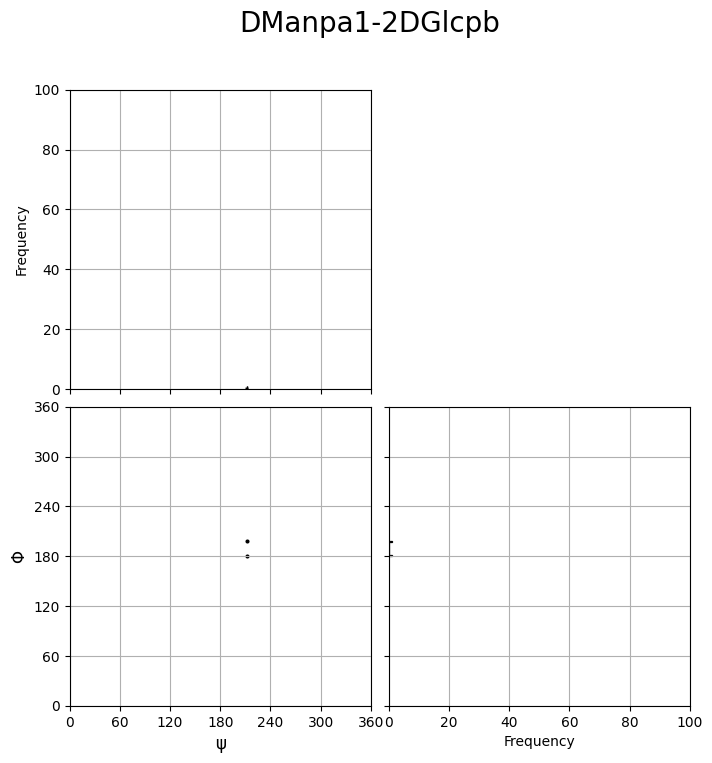

In [16]:
instant1.plot(torsions=instant1.torsions, title='DManpa1-2DGlcpb',max_histogram_scale=100,step_histogram_tick=20)